In [1]:
import pandas as pd
import seaborn as sns
infile='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22_tiered_rankedidea/cellular_fraction/perctcorr/maxscore_relative/CyTOF_prism_like_spearman_forboxplot.txt'

indf=pd.read_csv(infile,sep='\t')
indf.head()

,celltype,score_RankedSM,Oldcellularfraction_RankedSM,Maxscore_basedcellularfraction_RankedSM,score_TieredSM,Oldcellularfraction_TieredSM,Maxscore_basedcellularfraction_TieredSM
0,Naive CD8 T,0.607143,0.392857,0.607143,0.61,0.178571,0.714286
1,CD4 effector memory,0.571429,0.535714,0.250000,0.57,0.678571,0.428571
2,CD8 central memory,0.954994,0.900937,0.954994,0.95,0.954994,0.954994
3,Memory B,0.750000,0.750000,0.857143,0.71,0.785714,0.892857
4,CD8 effector,0.558581,0.558581,0.558581,0.56,0.558581,0.558581


In [2]:
def plotter(currentdf):

    melteddf=currentdf.melt(id_vars='celltype')

    ax=sns.boxplot(x="variable", y="value", data=melteddf,color='white')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax = sns.stripplot(x="variable", y="value", data=melteddf, hue='celltype',palette='Set2')
    ax.legend(loc=(1.04,0))

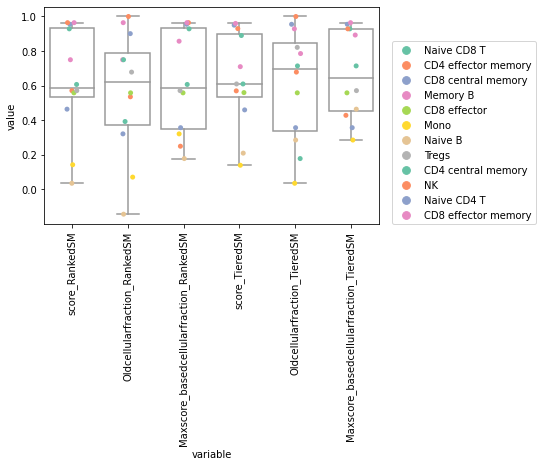

In [3]:
plotter(indf)

In [4]:
#indf['id']=indf.index
df = pd.wide_to_long(indf, stubnames=['score','Oldcellularfraction','Maxscore_basedcellularfraction'], i='celltype', j='SM',suffix='(!?RankedSM|TieredSM)',sep='_').reset_index()
df.head()

,celltype,SM,score,Oldcellularfraction,Maxscore_basedcellularfraction
0,Naive CD8 T,RankedSM,0.607143,0.392857,0.607143
1,CD4 effector memory,RankedSM,0.571429,0.535714,0.250000
2,CD8 central memory,RankedSM,0.954994,0.900937,0.954994
3,Memory B,RankedSM,0.750000,0.750000,0.857143
4,CD8 effector,RankedSM,0.558581,0.558581,0.558581


In [5]:
dfmelt = df.melt(id_vars=['SM','celltype'])
dfmelt

,SM,celltype,variable,value
0,RankedSM,Naive CD8 T,score,0.607143
1,RankedSM,CD4 effector memory,score,0.571429
2,RankedSM,CD8 central memory,score,0.954994
3,RankedSM,Memory B,score,0.750000
4,RankedSM,CD8 effector,score,0.558581
...,...,...,...,...
67,TieredSM,Tregs,Maxscore_basedcellularfraction,0.571429
68,TieredSM,CD4 central memory,Maxscore_basedcellularfraction,0.928571
69,TieredSM,NK,Maxscore_basedcellularfraction,0.928571
70,TieredSM,Naive CD4 T,Maxscore_basedcellularfraction,0.357143


Using zero_method  pratt
Oldcellularfraction_RankedSM v.s. Oldcellularfraction_TieredSM: Wilcoxon test (paired samples) with Bonferroni correction, P_val=9.173e-01 stat=2.450e+01
Using zero_method  pratt
score_RankedSM v.s. score_TieredSM: Wilcoxon test (paired samples) with Bonferroni correction, P_val=9.793e-01 stat=2.650e+01
Using zero_method  pratt
Maxscore_basedcellularfraction_RankedSM v.s. Maxscore_basedcellularfraction_TieredSM: Wilcoxon test (paired samples) with Bonferroni correction, P_val=7.604e-01 stat=1.500e+01


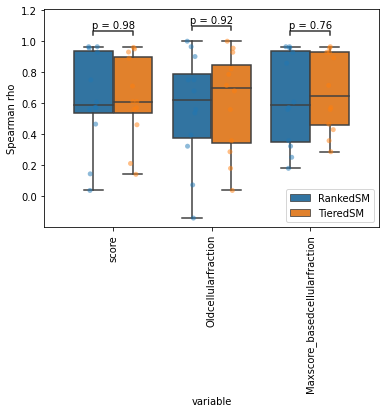

In [38]:
from statannot import add_stat_annotation
import matplotlib.pyplot as plt
ax=sns.boxplot(x="variable", y="value", data=dfmelt,hue='SM')
ax=sns.stripplot(x="variable", y="value", data=dfmelt,hue='SM',dodge=True,alpha=0.5,marker='o')
add_stat_annotation(ax, x="variable", y="value", data=dfmelt,hue='SM',
                    box_pairs=[( ( "score","RankedSM"),( "score","TieredSM")),( ( "Oldcellularfraction","RankedSM"),( "Oldcellularfraction","TieredSM")),( ( "Maxscore_basedcellularfraction","RankedSM"),( "Maxscore_basedcellularfraction","TieredSM"))],test='Wilcoxon', text_format='simple', loc='inside')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel('Spearman rho')
handles, labels = ax.get_legend_handles_labels()
# specify just one legend
l = plt.legend(handles[0:2], labels[0:2])
#ax.legend(loc=(1.04,0))
                              